# Avacado Project
#### Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

##### Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

##### Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold


##### Inspiration /Label 

Your task is to make a model that can consider the data provided and predict the Average Price.

# Importing the libraries

In [85]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import ARDRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from scipy.stats import zscore
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

# Loading the Dataset


In [86]:

df = pd.read_csv("avocado.csv")
df.drop("Unnamed: 0",axis=1, inplace=True)
df.head()

df.columns = ['Date', 'Average_Price', 'Total_Volume', 'PLU_4046', 'PLU_4225', 
              'PLU_4770','Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'Type', 'Year','Region']

df.head()

,Date,Average_Price,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### Shape of the dataset

The dataset appears to have a total of 30 rows and 17 columns including 1 target column

In [87]:
df.shape

(18249, 13)

# Preporcessing

### The dataset appears to have all the information intact and as 30 non null out of 30 rows.



### All the columns in this dataset have "int" datatype including the target variable "W" (Wins) and once 1 feature having "float" datatype

#### We can also see at the file size of this dataset which is 4.1 KB in this case

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           18249 non-null  object 
 1   Average_Price  18249 non-null  float64
 2   Total_Volume   18249 non-null  float64
 3   PLU_4046       18249 non-null  float64
 4   PLU_4225       18249 non-null  float64
 5   PLU_4770       18249 non-null  float64
 6   Total_Bags     18249 non-null  float64
 7   Small_Bags     18249 non-null  float64
 8   Large_Bags     18249 non-null  float64
 9   XLarge_Bags    18249 non-null  float64
 10  Type           18249 non-null  object 
 11  Year           18249 non-null  int64  
 12  Region         18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [89]:
df['Month'] = pd.DatetimeIndex(df['Date']).month
df['Day'] = pd.DatetimeIndex(df['Date']).day
df.drop(columns='Date', inplace=True)
df

,Average_Price,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,1,14


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Average_Price  18249 non-null  float64
 1   Total_Volume   18249 non-null  float64
 2   PLU_4046       18249 non-null  float64
 3   PLU_4225       18249 non-null  float64
 4   PLU_4770       18249 non-null  float64
 5   Total_Bags     18249 non-null  float64
 6   Small_Bags     18249 non-null  float64
 7   Large_Bags     18249 non-null  float64
 8   XLarge_Bags    18249 non-null  float64
 9   Type           18249 non-null  object 
 10  Year           18249 non-null  int64  
 11  Region         18249 non-null  object 
 12  Month          18249 non-null  int64  
 13  Day            18249 non-null  int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 1.9+ MB


# Let's now observe the stats of the dataset

### All the values are accounted for and has no missing values

#### Difference between mean and std also seems fine . However we will check for skewness if any in the further steps

##### We can see the columns "W",  "3B", "SB", "CG", "SHO" have more deviation than the other columns as the difference between the mean and std is high compared to other columns.

##### We can also see there are some outliers and its evident in the coumns "H", "HR", "BB",  "SO", "SB", "RA", "ER", "CG", "SHO", "E".

##### We will try to reduce the outliers in the further steps

In [91]:
df.describe()

,Average_Price,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Year,Month,Day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


# Lets plot a couple of plots for further understanding

#### From the below chart and calculation we can observe that both "conventional" and "organic" types of avocados have almost same amout of percentage.

#### From this dataset we have approximately 50.008 % of  "conventional" avocados and approximately 49.99 % of  "organic" avocados.

In [92]:
ava_percent = (df["Type"].value_counts()/df.shape[0])*100
print(ava_percent)

conventional    50.00822
organic         49.99178
Name: Type, dtype: float64


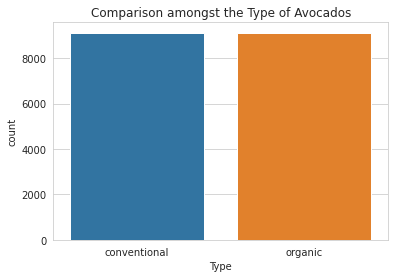

In [93]:
sns.set_style("whitegrid")
sns.countplot(x="Type", data=df).set(title='Comparison amongst the Type of Avocados')
plt.show()

#### Lets observe if there is any relationship with regards to average price.

#### We can see that "Organic" avocados have higher average price that that of "conventional" avocados.

#### "Organic" food items claim to have no pesticides or any other harmful chemicals included for nurturing or maintaing the food items and it takes more amout to handle the maintenance and good care of such food items.

#### On the contrary, "conventional" food items may include the use of artificial incredients or chemicals. Hence the price appears to be cheaper for this category.

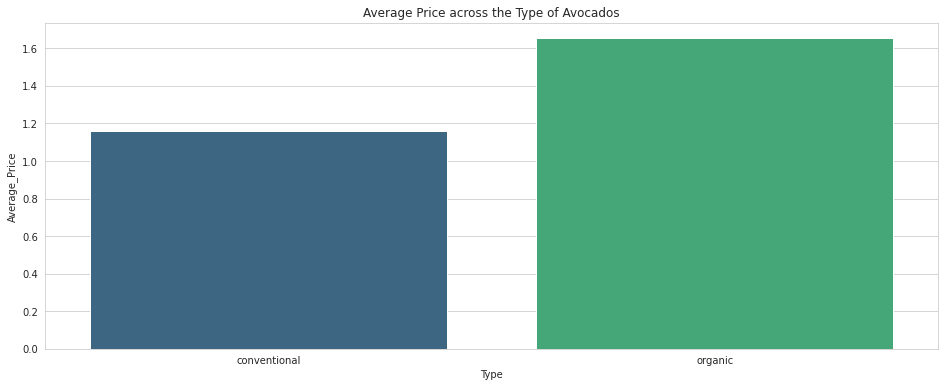

In [94]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Type", y="Average_Price", data=df, palette="viridis", ci=None, orient="v").set(title='Average Price across the Type of Avocados')
plt.show()

#### Lets observe if there is any relation between total quantities sold and avocado types

#### As discussed in the previous graph, it appears over here also that "conventional" avocados have high volume of sales compared to "organic" avocados

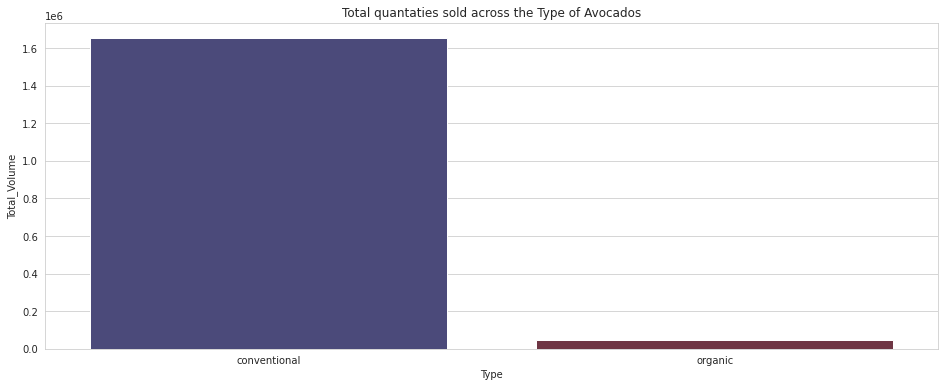

In [95]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Type", y="Total_Volume", data=df, palette="icefire", ci=None, orient="v").set(title='Total quantaties sold across the Type of Avocados')
plt.show()

#### Lets observe teh relationship between total quantaties sold and the year 

#### We have data for 4 years from 2015 to 2018 and it appears 2018 has highest sales count and the sales has gradually increased where 2015 had the least amout of sales

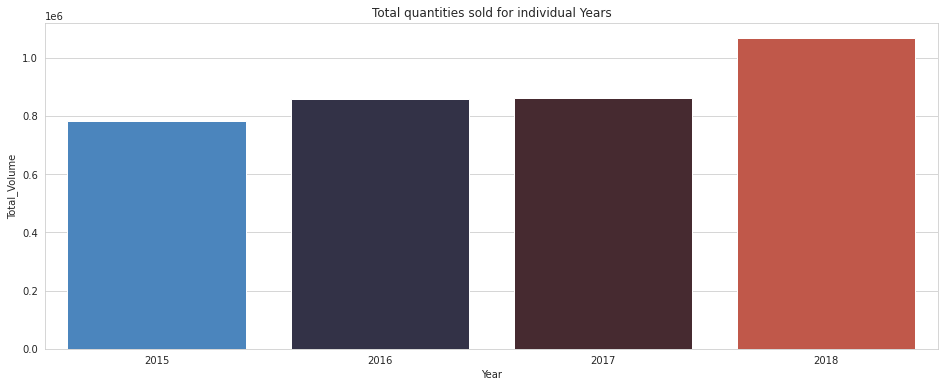

In [96]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Year", y="Total_Volume", data=df, palette="icefire", ci=None, orient="v").set(title='Total quantities sold for individual Years')
plt.show()

#### Lets observe if there is any relation for specific months and the avaeage price

#### It appears for the years 2015, 2016 and 2017 had highest average price in general between Sept, Oct, and Nov. This could suggest, these months may not be the ideal season for Avocados in the US in general hence the price is high.

#### Also, for the year 2018, we have price data for only Jan, Feb and March. Maybe this dataset was prepared within these months and hence we don't have any other months details 

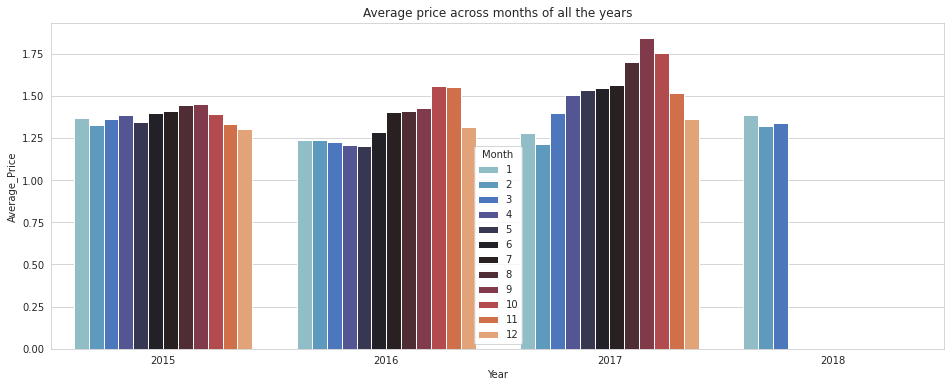

In [97]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Year", y="Average_Price", hue="Month", data=df, palette="icefire", ci=None, orient="v").set(title='Average price across months of all the years')
plt.show()

#### Lets observe if there is any relation between total volume and month

#### In this dataset we can observe that Feb had highest total quantities sold and also in the month of May. The data seemed to be consistent and after May dsales count seems to be declining

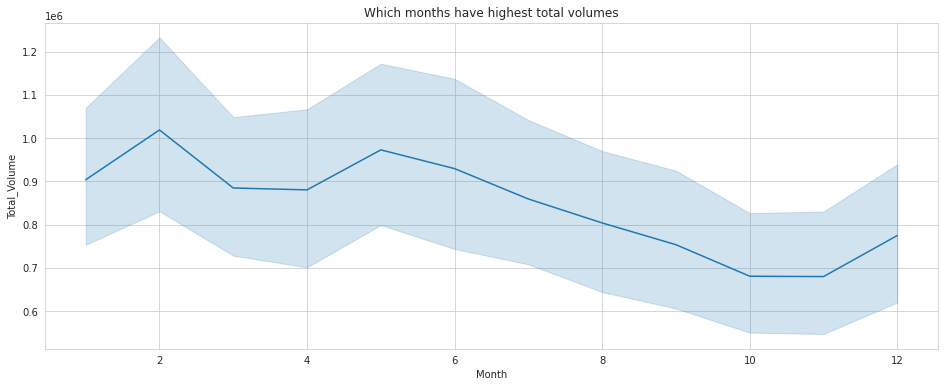

In [98]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(x="Month", y="Total_Volume", data=df, palette="icefire").set(title='Which months have highest total volumes')
plt.show()

#### We can observe there is a relationship between the avocado type "PLU_4046" and the total volumes

#### The average price remained stable within the range of 0.5 to 1.5 average price.

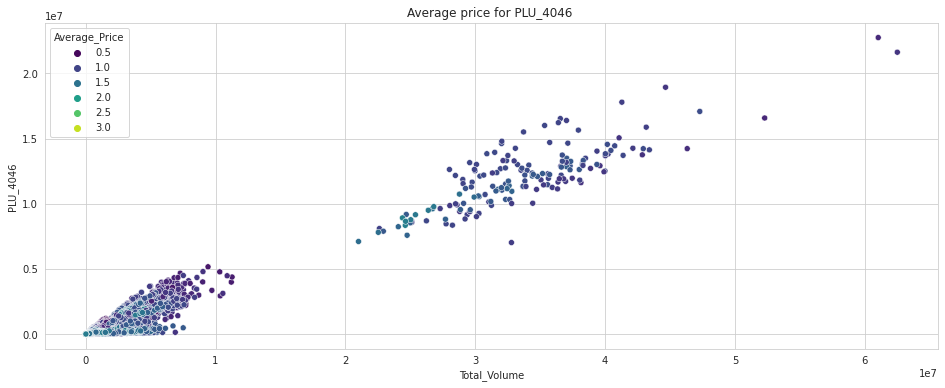

In [99]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df, x="Total_Volume", y="PLU_4046", hue="Average_Price", palette="viridis").set(title='Average price for PLU_4046 ')
plt.show()

#### We can observe there is a relationship between the avocado type "PLU_4225" and the total volumes

#### The average price remained stable within the range of 0.5 to 1 average price.

#### The demand for this type of avocado seems to be a little less than PLU_4046 in terms of average price

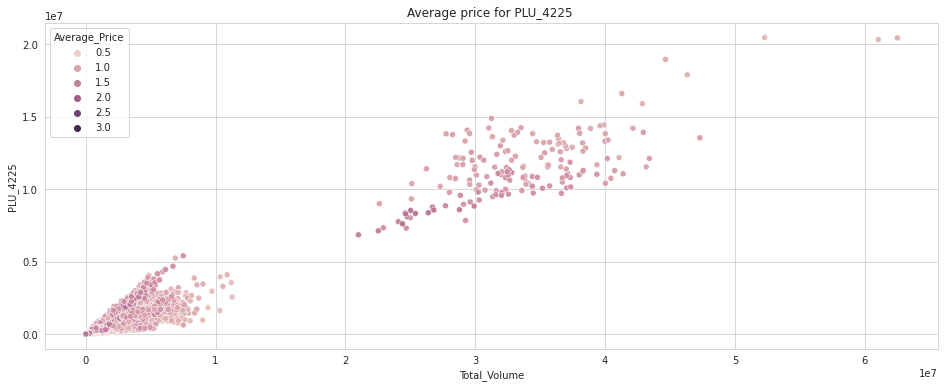

In [100]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df, x="Total_Volume", y="PLU_4225", hue="Average_Price").set(title='Average price for PLU_4225 ')
plt.show()

#### We can observe there is a relationship between the avocado type "PLU_4770" and the years
#### This type of avocado seems to be sold more in the months between 2017 and 2018 compared to previous years
#### These are non-organic extra large Hass avocados and shows us the trend of sales for these years in specific

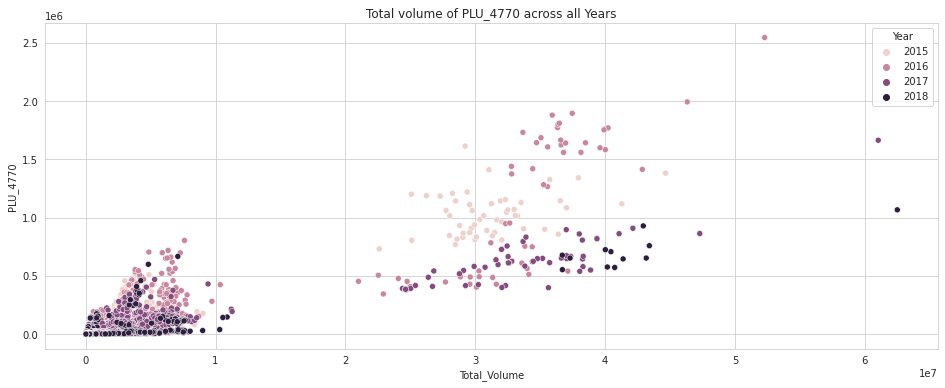

In [101]:
plt.figure(figsize=(16, 6))
sns.scatterplot(data=df, x="Total_Volume", y="PLU_4770", hue="Year").set(title='Total volume of PLU_4770 across all Years')
plt.show()

#### From the below plot we can see that "conventional" avocados were sold consistently in 2016 and 2017 as data is less scattered
#### And for "organic" avocado, although sales are less as expected and as shown in previous plots, we can notice the sale in general is gradually increased. 
#### However it make no much variation and seems to be very much consistent

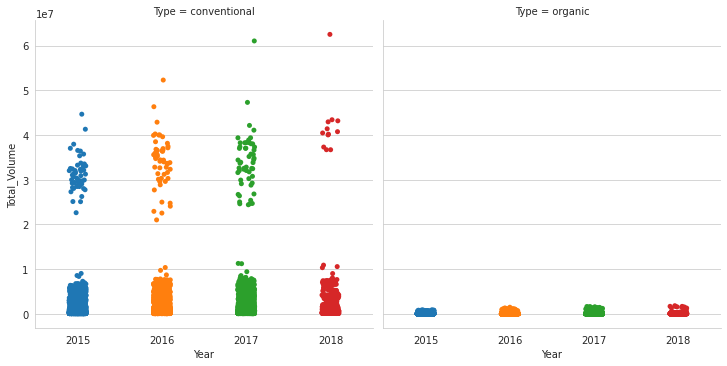

In [102]:
g = sns.catplot(x="Year", y="Total_Volume", col="Type", data=df)

#### From the below plot we can observe that amout of use of bags increase as and when total sale of quantities of avocados increase.

#### There is smooth transition of gradual increase and its highly related.

<Figure size 1152x432 with 0 Axes>

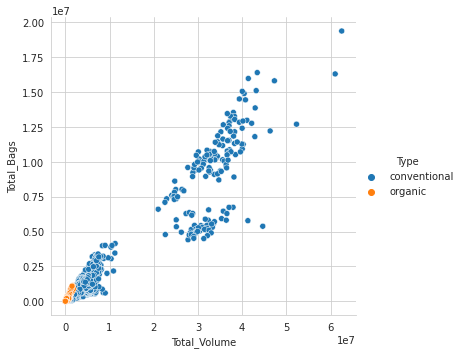

In [103]:
plt.figure(figsize=(16, 6))
sns.relplot(data=df, x="Total_Volume", y="Total_Bags", hue="Type")
plt.show()

#### Lets see if we have any relation with regards to average price across regions in USA

#### We can see the average price in  cities / provinces "Harisburg Scranton" and "San Fransisco" is higher than other cities / provinces.

#### This could indicate that these cities consume more hence the price is high, or storing the fruits and such perishable food items is difficult hence increase in price is a way to balance between the sales and damages that may occur.

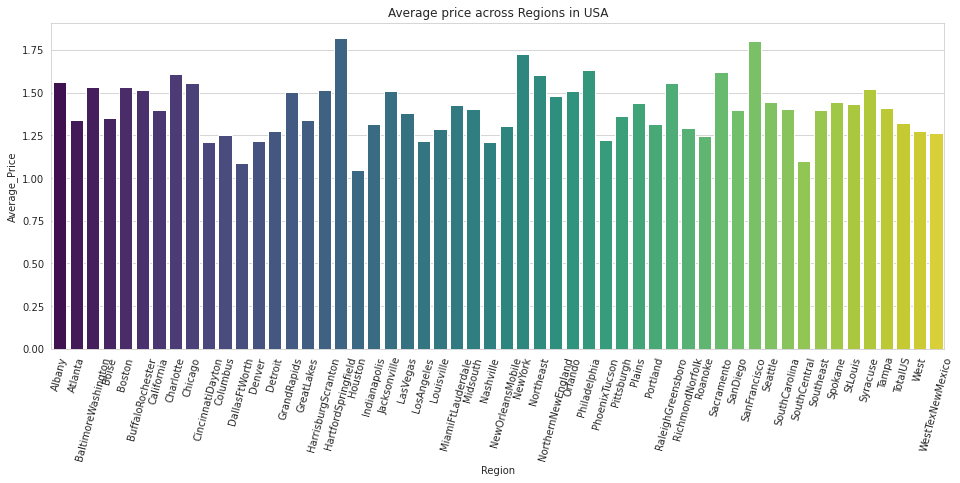

In [104]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Region", y="Average_Price", data=df, palette="viridis", ci=None, orient="v").set(title='Average price across Regions in USA')
plt.xticks(rotation=75)
plt.show()

#### We can observe from the below plot the price is at peak during Sept and Oct months.

#### It is also true that USA imports most of its food demands from other countries and Avocados are mainly imported from Peru.

#### Maybe the seasons and economic conditions of other countries impact the price change or increase for specific months also

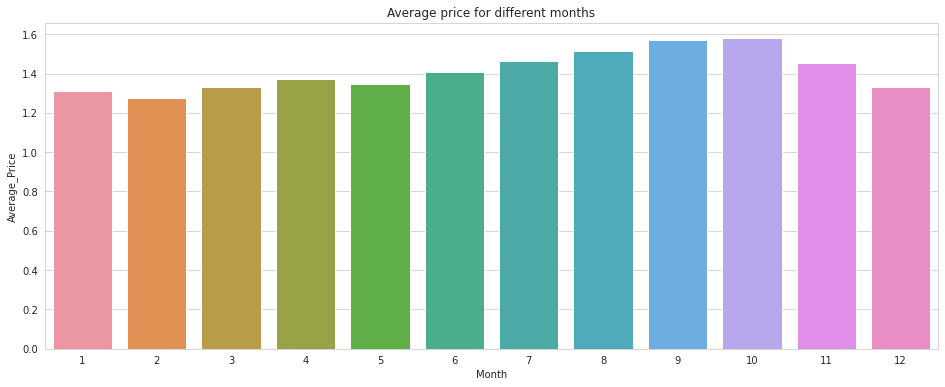

In [105]:
plt.figure(figsize=(16, 6))
sns.barplot(data=df, x="Month", y="Average_Price", ci=None).set(title='Average price for different months')
plt.show()

# Preprocessing

### Encoding the dataset
##### I have used LabelEncoder as the data is categorical and is not ordinal in nature.
##### We have columns "Type" and "Region" and will convert these inot numeric values using the above method

In [106]:
df.columns

Index(['Average_Price', 'Total_Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'Type', 'Year',
       'Region', 'Month', 'Day'],
      dtype='object')

In [107]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [108]:
df_new1 = lab_enc.fit_transform(df["Type"])
df_new2 = lab_enc.fit_transform(df["Region"])

In [109]:
df["Type"] = df_new1
df["Region"] = df_new2

#### We can now observer the values are now converted into numrical vaules and we can look at distribution in further steps

In [110]:
df.head()

,Average_Price,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month,Day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


In [111]:
df.shape

(18249, 14)

# Distribution of all the columns in the dataset


### All the features seem to be a little less normal distributed. So let us try to identify and remove outliers to check if the output can be imporved

#### Apart from columns "Type", "Year", "Region", "Month" and "Day", we are going to remove or try to reduce the outliers for all the columns as data is skewed.

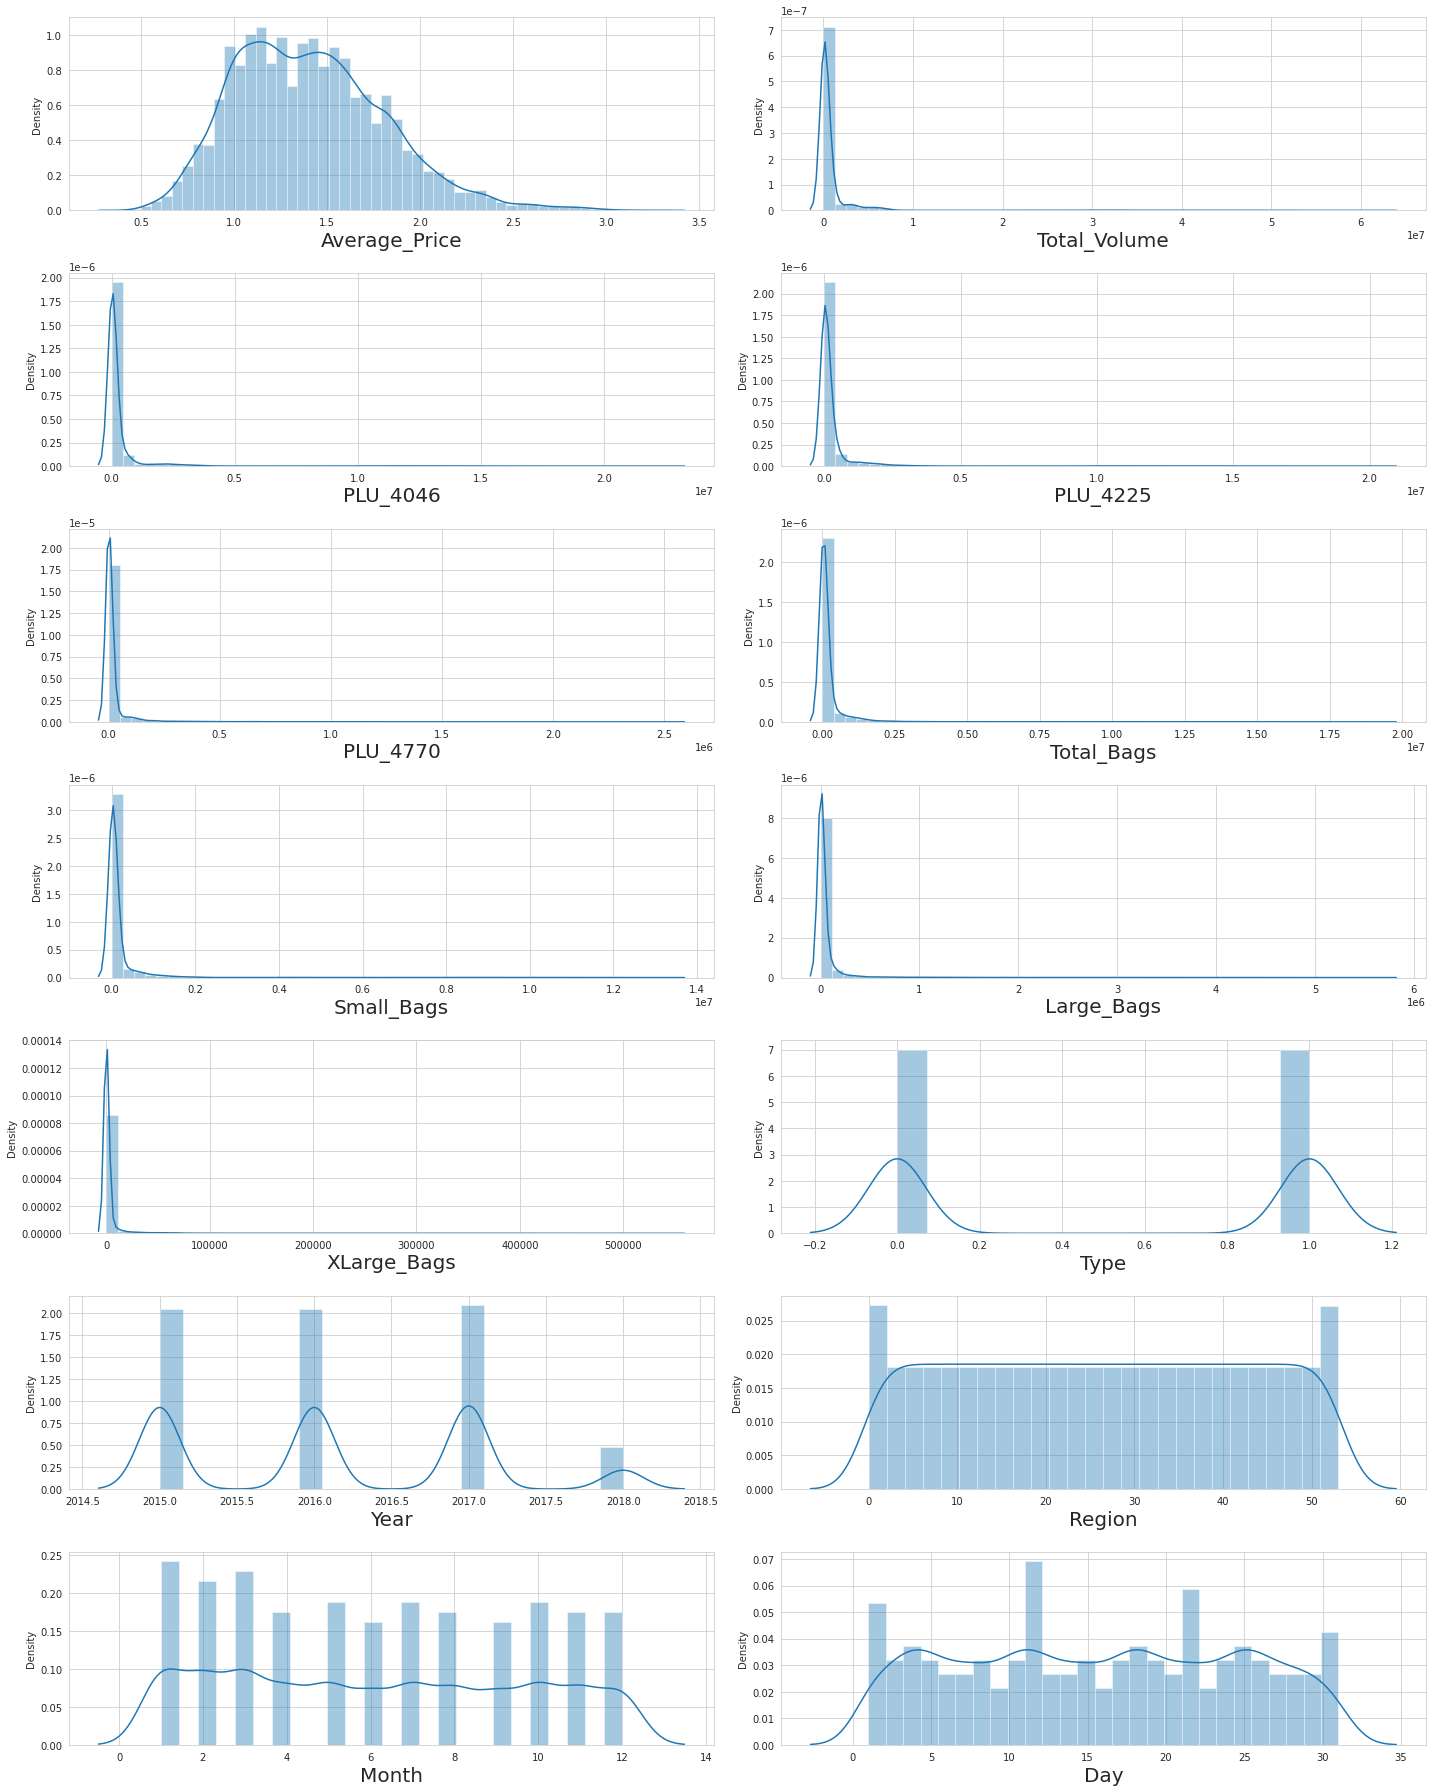

In [112]:
# let us now see the distribution of the dataset we have

plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(7,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

### Identifying the column names to pass it for outlier removal

In [113]:
df.columns

Index(['Average_Price', 'Total_Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770',
       'Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags', 'Type', 'Year',
       'Region', 'Month', 'Day'],
      dtype='object')

# Applying Z-score to identify and remove outliers

### It appears the dataset has removed / reduced outliers to some extent

### The stats show reduction of total values in the dataset to minimal extent only

#### We can still see outliers in columns "E" and "SHO" but overall the difference between mean and std looks fine.

#### Also the values of Quartiles appears to gradually increase which looks fine 

In [114]:
from scipy.stats import zscore

z_score = zscore(df[['Average_Price', 'Total_Volume', 'PLU_4046', 'PLU_4225', 'PLU_4770','Total_Bags', 'Small_Bags', 'Large_Bags', 'XLarge_Bags']])
abs_zscore = np.abs(z_score)

filtering_entry = (abs_zscore < 3).all(axis=1)

df = df[filtering_entry]



# the data now seems much better than before.

df.describe()

,Average_Price,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags,Type,Year,Region,Month,Day
count,17651.000000,1.765100e+04,1.765100e+04,1.765100e+04,17651.000000,1.765100e+04,1.765100e+04,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000,17651.000000
mean,1.405363,4.612232e+05,1.546436e+05,1.656009e+05,11160.558411,1.298160e+05,1.006283e+05,27830.325482,1357.351712,0.509433,2016.137669,26.103110,6.178347,15.685400
std,0.385793,1.012727e+06,4.395780e+05,3.991041e+05,34488.049314,2.821081e+05,2.295134e+05,73026.707330,5240.345626,0.499925,0.940239,15.396005,3.539935,8.775959
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,2015.000000,0.000000,1.000000,1.000000
25%,1.110000,1.056651e+04,8.219250e+02,2.889740e+03,0.000000,4.959780e+03,2.746415e+03,112.660000,0.000000,0.000000,2015.000000,13.000000,3.000000,8.000000
50%,1.380000,1.002071e+05,7.785240e+03,2.670378e+04,163.960000,3.756260e+04,2.454157e+04,2448.660000,0.000000,1.000000,2016.000000,26.000000,6.000000,16.000000
75%,1.660000,3.911843e+05,9.840492e+04,1.288019e+05,5284.600000,1.020218e+05,7.838981e+04,19089.250000,73.670000,1.000000,2017.000000,39.000000,9.000000,23.000000
max,2.610000,8.362504e+06,4.085859e+06,3.894802e+06,344488.510000,2.782725e+06,2.348868e+06,781447.290000,55940.330000,1.000000,2018.000000,53.000000,12.000000,31.000000


### Percentage of Data Loss

#### It is told that if the data loss is more than 7 to 8%, we may not get accurate results. In this case its approximately 3.27 % and not much of data is lost

In [115]:
# Percentage data loss:

loss_percent = (18249-17651)/18249*100
print(loss_percent)

3.276891884486821


# Distribution of all the columns in the dataset (post z-score)

#### The dataset appears to be slightly normally distributed than before.

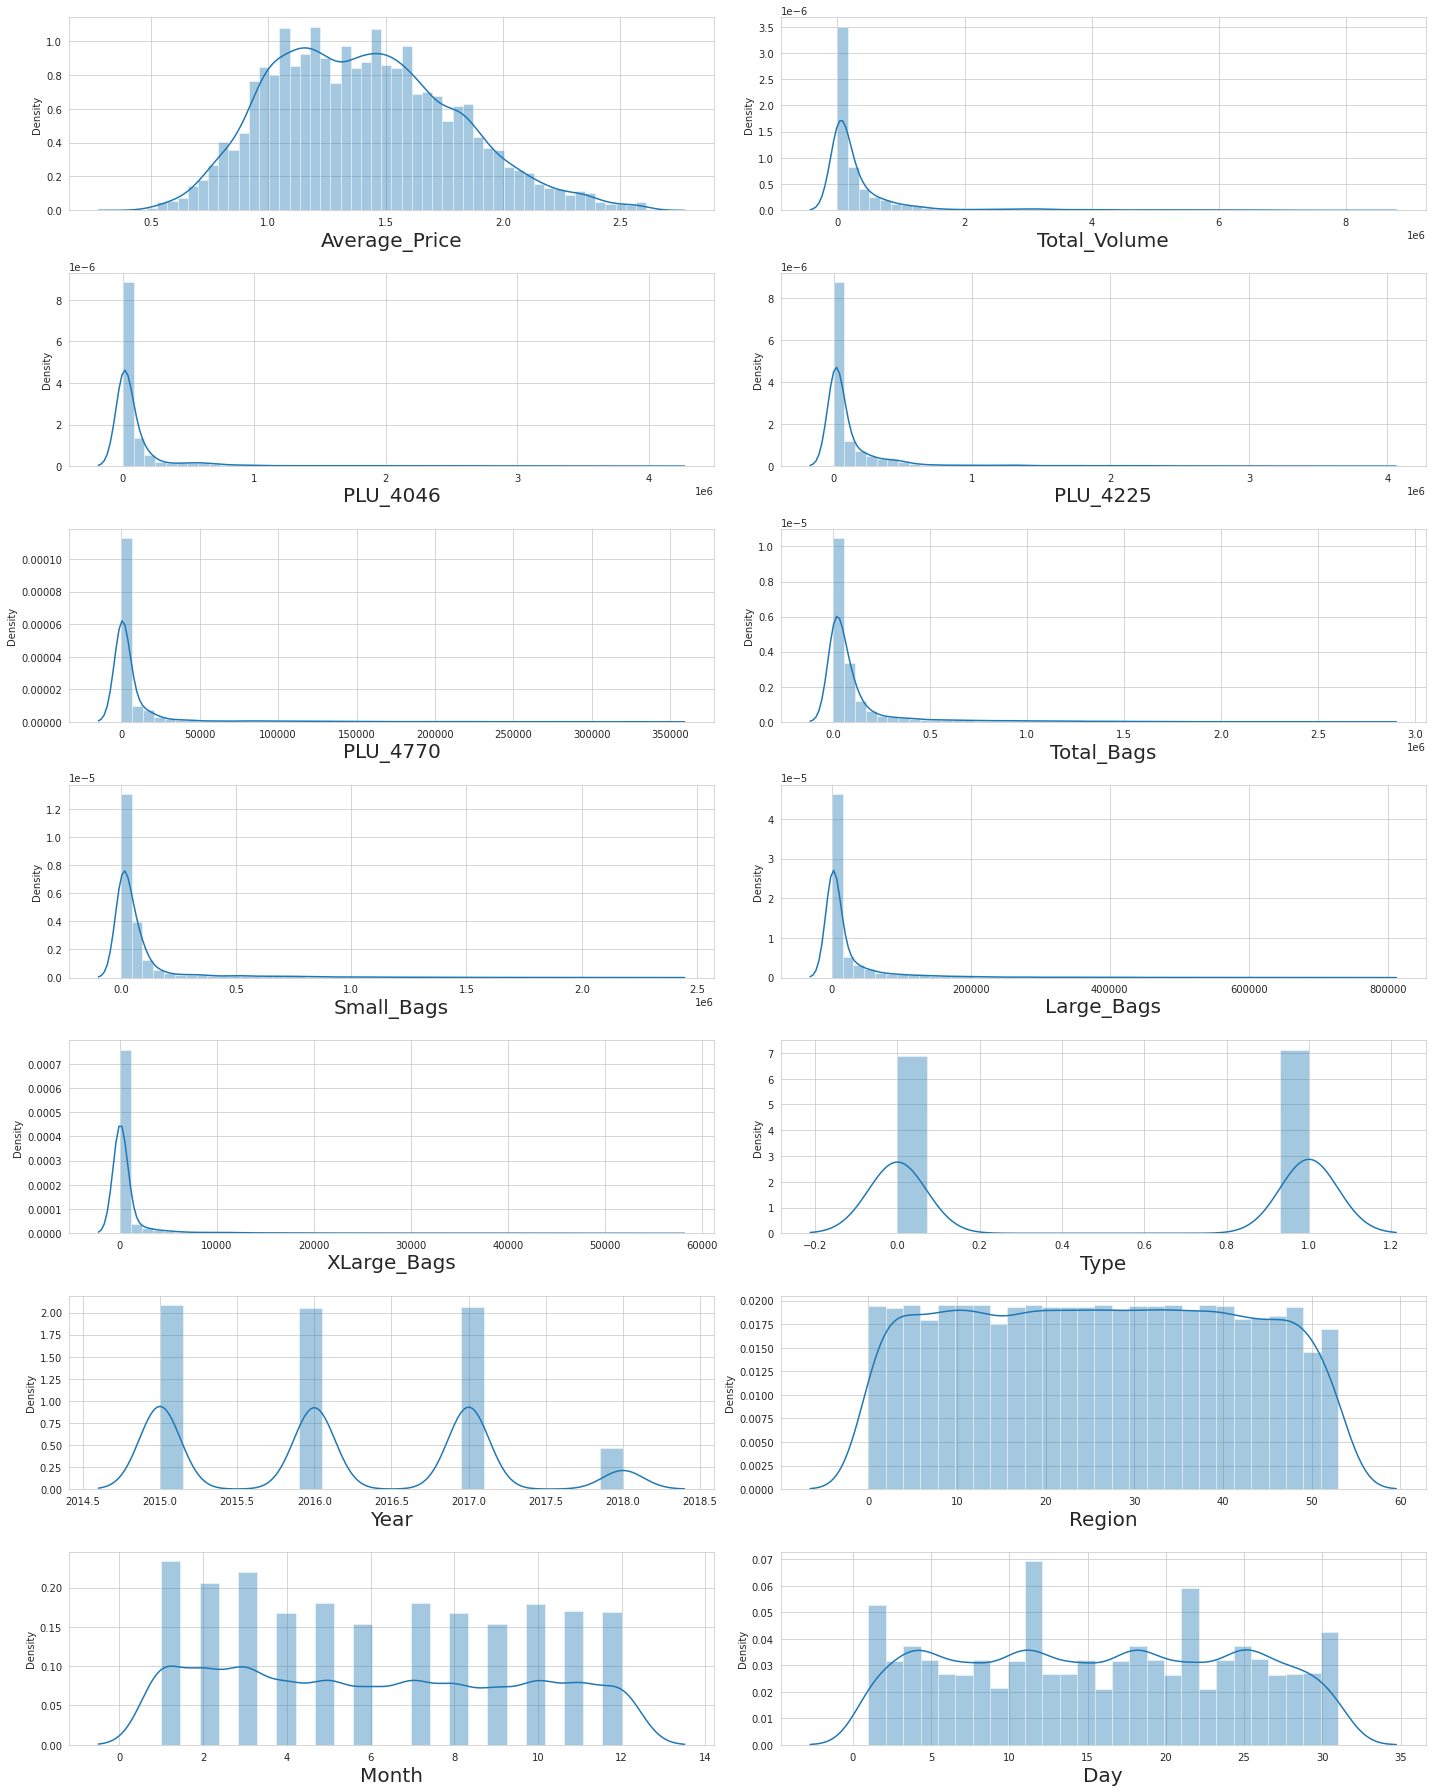

In [116]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(7,2, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

## Correlation of the features with the dependent variable "Average_Price"

#### The values are high for all the columns "XLarge_Bags",   "PLU_4770",   "PLU_4225",  "Large_Bags",  "Small_Bags",  "Total_Bags",   "Total_Volume" and  "PLU_4046" have correlation little higher.

In [117]:
corr_matrix = df.corr()
corr_matrix["Average_Price"].sort_values(ascending=False)

Average_Price    1.000000
Type             0.613150
Month            0.149502
Year             0.091704
Day              0.026819
Region          -0.003242
XLarge_Bags     -0.152669
PLU_4770        -0.243465
PLU_4225        -0.243988
Large_Bags      -0.270915
Small_Bags      -0.275771
Total_Bags      -0.297323
Total_Volume    -0.332056
PLU_4046        -0.333577
Name: Average_Price, dtype: float64

## Lets us now examine correlation using a "heatmap" for further clarification


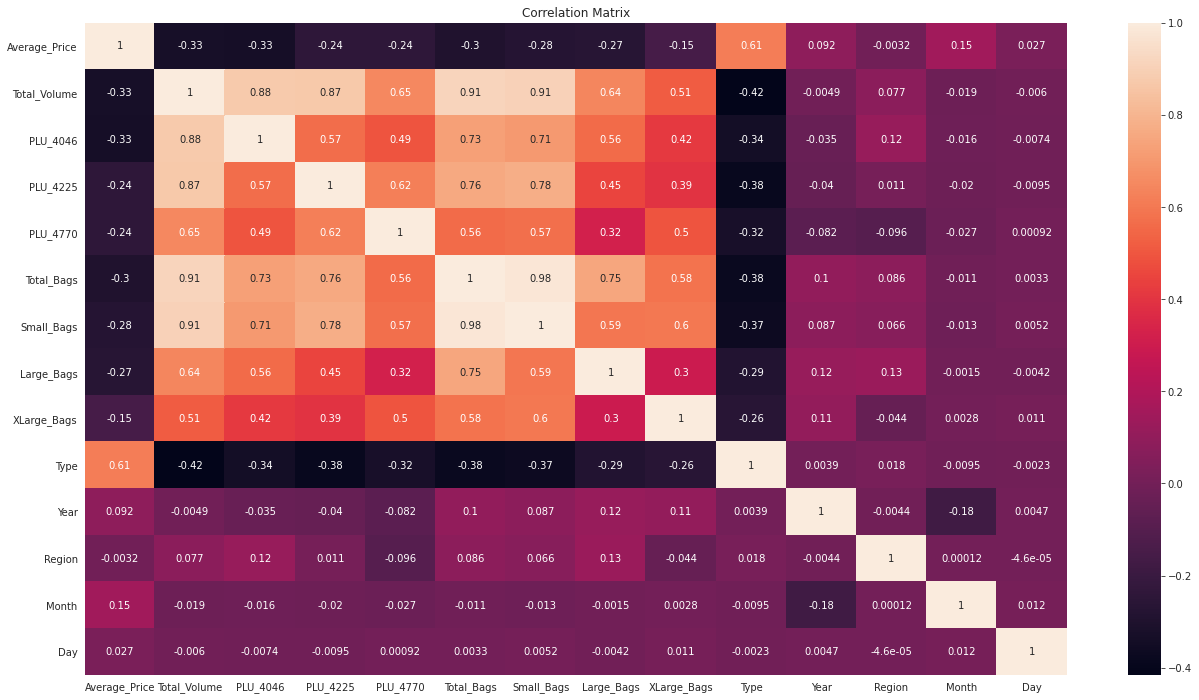

In [118]:
plt.figure(figsize=(22,12))
sns.heatmap(corr_matrix, annot=True)
plt.title("Correlation Matrix")
plt.show()

# Splitting up of dataset between x (features) and y (target column)

In [119]:
x = df.drop(columns = ["Average_Price"], axis=1)
y = df["Average_Price"]

### Check for skewness of data

#### The data is not skewed and it falls within the accepted range

#### Columns "Total_Volume",   "PLU_4046",  "PLU_4225",  "PLU_4770",   "Total_Bags",   "Small_Bags",  "Large_Bags",  "XLarge_Bags"   have skewness amongst each other.

#### Let's now proceed to further remove/ reduce the skewness for better results

In [120]:
x.skew()

Total_Volume    3.767138
PLU_4046        4.909848
PLU_4225        4.455745
PLU_4770        5.117170
Total_Bags      4.066771
Small_Bags      4.222706
Large_Bags      5.053434
XLarge_Bags     6.135607
Type           -0.037741
Year            0.229976
Region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

# Storing the list of features having skewness in a variable "features". It's would be easier to pass it through at one go


In [121]:
features =["Total_Volume", "PLU_4046", "PLU_4225", "PLU_4770", "Total_Bags", "Small_Bags", "Large_Bags", "XLarge_Bags"]

# Lets us now Scale the data for further processing.¶

#### we have used StandardScaler for further scaling up of data 

In [122]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Power Transformer (yeo-Johnson)
To reduce the skewness to some extent, I have used a Power Transformer technique

## The data is further standardized

In [123]:
from sklearn.preprocessing import PowerTransformer

scaler = PowerTransformer(method="yeo-johnson")

x[features] = scaler.fit_transform(x[features].values) 

x[features]

,Total_Volume,PLU_4046,PLU_4225,PLU_4770,Total_Bags,Small_Bags,Large_Bags,XLarge_Bags
0,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919
1,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919
2,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919
3,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919
4,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919
...,...,...,...,...,...,...,...,...
18244,-0.678214,-0.462066,-0.926028,-1.228986,-0.340422,-0.175753,-0.412401,-0.677919
18245,-0.771326,-0.618019,-0.670600,-1.228986,-0.509513,-0.331971,-0.484991,-0.677919
18246,-0.775274,-0.617966,-0.778893,0.445710,-0.503366,-0.313756,-0.950743,-0.677919
18247,-0.701797,-0.547011,-0.716371,0.445399,-0.434176,-0.250408,-0.916068,-0.677919


# Check the skewness of the feature dataset

#### The skewness seems to have reduced considerably than before

In [124]:
x.skew()

Total_Volume   -0.008642
PLU_4046       -0.039282
PLU_4225       -0.044675
PLU_4770        0.024168
Total_Bags     -0.022204
Small_Bags     -0.024405
Large_Bags     -0.110913
XLarge_Bags     0.853758
Type           -0.037741
Year            0.229976
Region          0.012798
Month           0.107408
Day             0.011778
dtype: float64

# Distribution after skewness is removed

#### AB and H features seem to be completely symmetrical

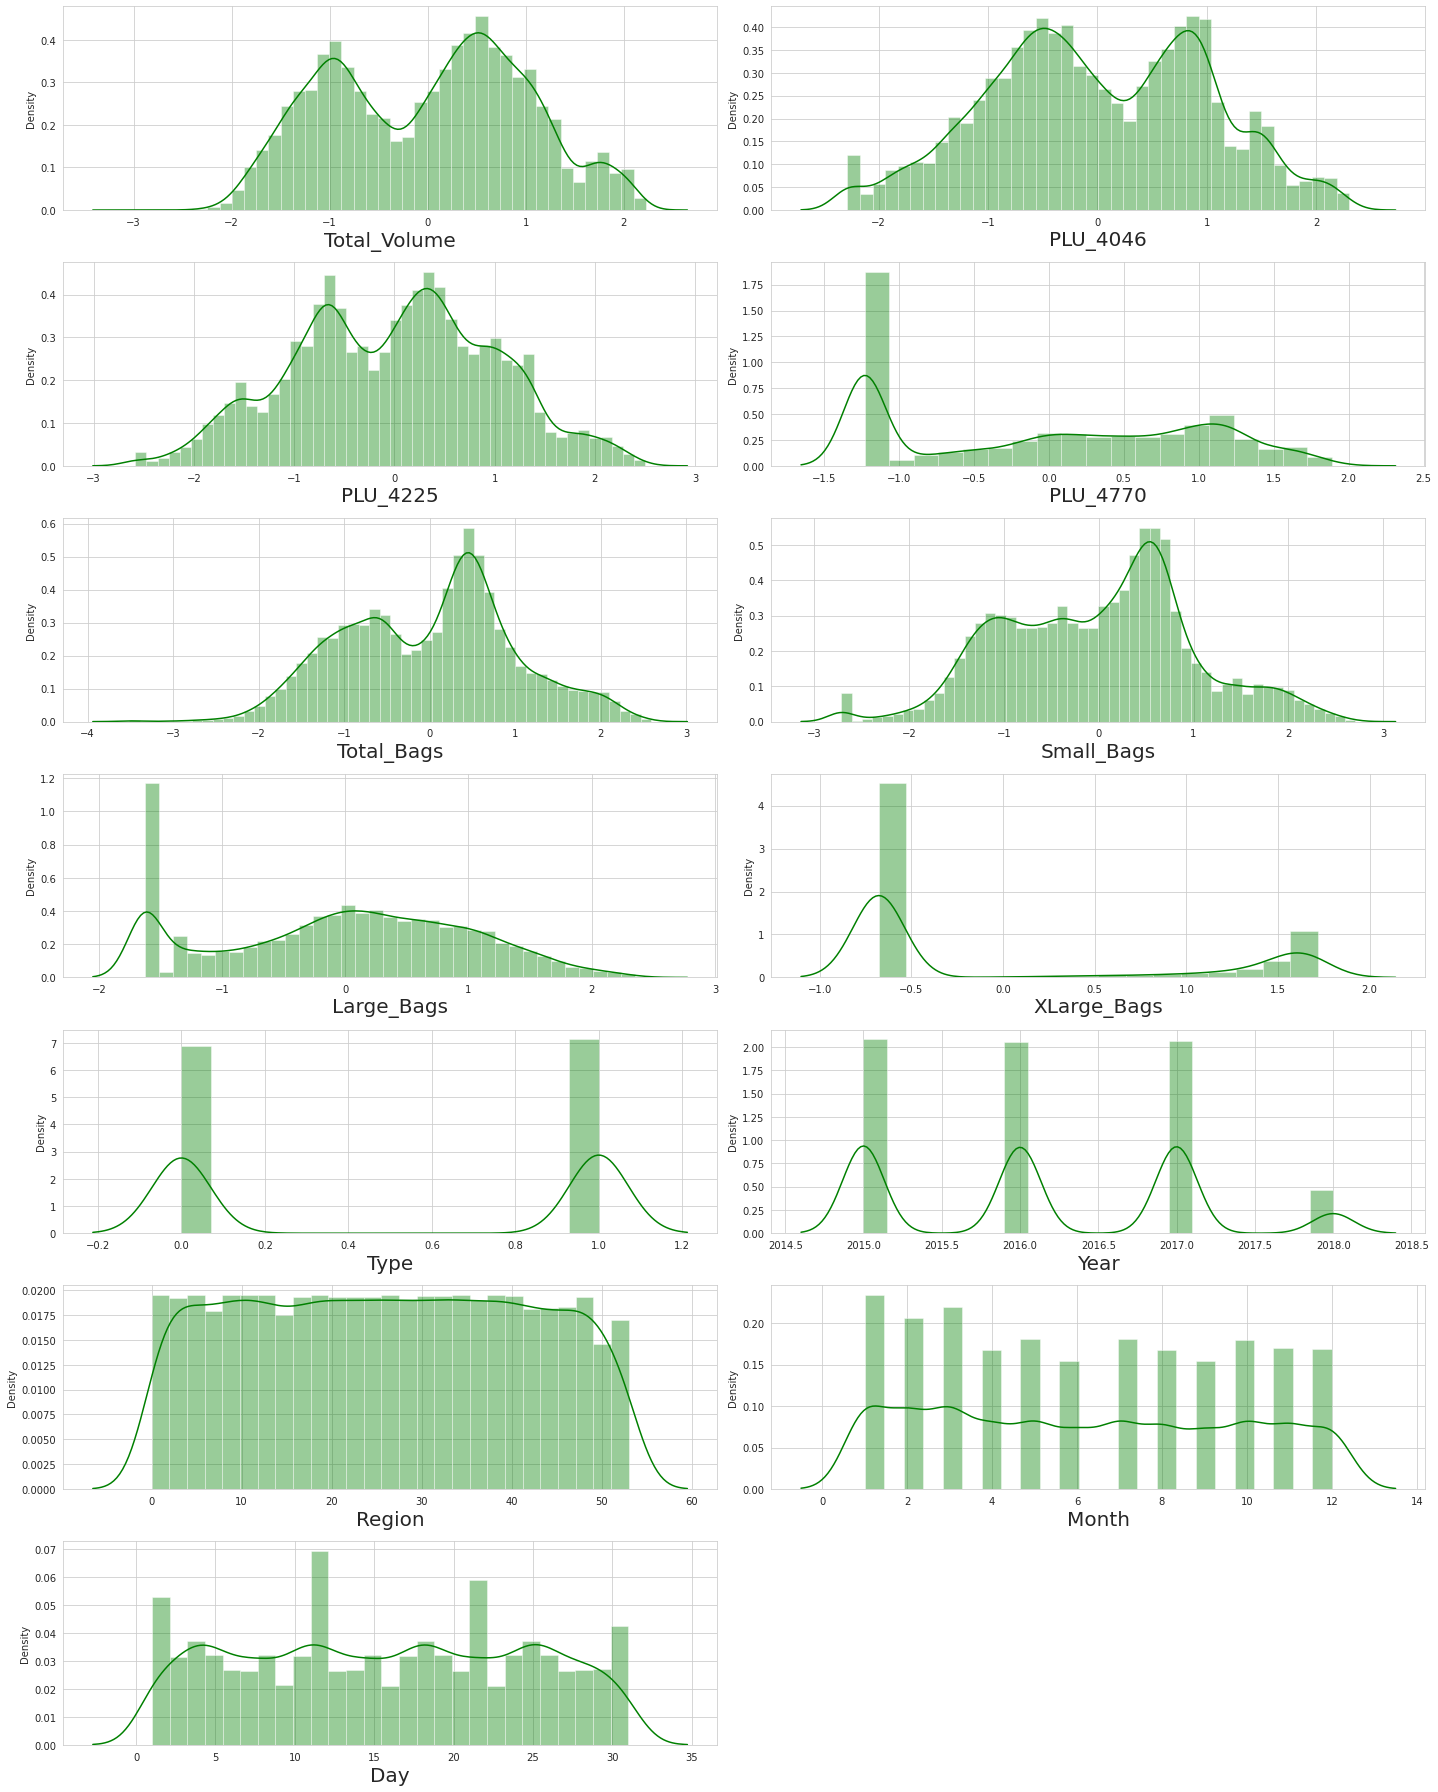

In [125]:
plt.figure(figsize=(20,25), facecolor="white")
plotnumber = 1

for column in x:
    if plotnumber <=14:
        ax = plt.subplot(7,2, plotnumber)
        sns.distplot(x[column], color="green")
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.tight_layout()

# Finding variance inflation factor in each scaled column¶
### This gives us relationship between feature vs feature and we can drop if necessary to avoid multicolinearity
### From the below observation, it appears the columns "PLU_4046" and "XLarge_Bags" have very high multicollinearity.


In [126]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled, i) for i in range(x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,4.127969e+08,Total_Volume
1,7.777070e+07,PLU_4046
2,6.410838e+07,PLU_4225
3,4.787390e+05,PLU_4770
4,1.924615e+13,Total_Bags
5,1.275807e+13,Small_Bags
6,1.290985e+12,Large_Bags
7,6.647527e+09,XLarge_Bags
8,1.232129e+00,Type
9,1.132830e+00,Year


# split the dataset into train and test data set

In [127]:

x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.30, random_state = 200)


# Building Machine Learning Models

### Create multi output regression models



### 1) DecisionTreeRegressor

In [128]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

y_pred = dt_reg.predict(x_test)

print("Adjusted R2 squared : ",dt_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  0.13411253776435045
Mean Squared Error (MSE):  0.04164977341389728
Root Mean Squared Error (RMSE):  0.20408276118745866


### 2) RandomForestRegressor

In [129]:
rf_reg = RandomForestRegressor()
rf_reg.fit(x_train,y_train)

y_pred = rf_reg.predict(x_test)

print("Adjusted R2 squared : ",rf_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.9828957847923182
Mean Absolute Error (MAE):  0.09471446374622357
Mean Squared Error (MSE):  0.01775010221676737
Root Mean Squared Error (RMSE):  0.13322950955688223


### 3) AdaBoostRegressor

In [130]:
from sklearn.ensemble import AdaBoostRegressor

adb_reg = AdaBoostRegressor()
adb_reg.fit(x_train,y_train)

y_pred = adb_reg.predict(x_test)

print("Adjusted R2 squared : ",adb_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.5516277513939123
Mean Absolute Error (MAE):  0.21182439525182495
Mean Squared Error (MSE):  0.0675075185539929
Root Mean Squared Error (RMSE):  0.2598220901963359


### 4) KNeighborsRegressor

In [131]:
from sklearn.neighbors import KNeighborsRegressor

k_neigh = KNeighborsRegressor()
k_neigh.fit(x_train,y_train)

y_pred = k_neigh.predict(x_test)

print("Adjusted R2 squared : ",k_neigh.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  0.7106105710836546
Mean Absolute Error (MAE):  0.18258043806646523
Mean Squared Error (MSE):  0.06351498111782476
Root Mean Squared Error (RMSE):  0.2520217869903806


### 5) ExtraTreesRegressor

In [132]:
from sklearn.ensemble import ExtraTreesRegressor

ext_reg = ExtraTreesRegressor()
ext_reg.fit(x_train,y_train)

y_pred = ext_reg.predict(x_test)

print("Adjusted R2 squared : ",ext_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))

Adjusted R2 squared :  1.0
Mean Absolute Error (MAE):  0.0789385951661631
Mean Squared Error (MSE):  0.012803898716012077
Root Mean Squared Error (RMSE):  0.11315431373134688


### 6) HistGradientBoostingRegressor

In [134]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor

hist_reg = HistGradientBoostingRegressor()
hist_reg.fit(x_train,y_train)

y_pred = hist_reg.predict(x_test)

print("Adjusted R2 squared : ",hist_reg.score(x_train,y_train))
print("Mean Absolute Error (MAE): ", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE): ",mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE): ",np.sqrt(mean_squared_error(y_test, y_pred)))


Adjusted R2 squared :  0.9047386738788382
Mean Absolute Error (MAE):  0.10445293366392185
Mean Squared Error (MSE):  0.019282993312243365
Root Mean Squared Error (RMSE):  0.13886321799613952


# Cross validation to check if its overfitting

#### We have considered 5 CV values

In [135]:
from sklearn.model_selection import cross_val_score

In [136]:
scr = cross_val_score(dt_reg, x, y, cv=5)
print("Cross Validation score of DecisionTreeRegressor model is:", scr.mean())

Cross Validation score of DecisionTreeRegressor model is: -0.2268973351212329


In [137]:
scr = cross_val_score(rf_reg, x, y, cv=5)
print("Cross Validation score of RandomForestRegressor model is:", scr.mean())

Cross Validation score of RandomForestRegressor model is: 0.21348325302473112


In [138]:
scr = cross_val_score(adb_reg, x, y, cv=5)
print("Cross Validation score of AdaBoostRegressor model is:", scr.mean())

Cross Validation score of AdaBoostRegressor model is: 0.030679651799928175


In [139]:
scr = cross_val_score(k_neigh, x, y, cv=5)
print("Cross Validation score of KNeighborsRegressor model is:", scr.mean())

Cross Validation score of KNeighborsRegressor model is: -0.20675051065256733


In [140]:
scr = cross_val_score(ext_reg, x, y, cv=5)
print("Cross Validation score of ExtraTreesRegressor model is:", scr.mean())

Cross Validation score of ExtraTreesRegressor model is: 0.2911764943100093


In [142]:
scr = cross_val_score(hist_reg, x, y, cv=5)
print("Cross Validation score of HistGradientBoostingRegressor model is:", scr.mean())

Cross Validation score of HistGradientBoostingRegressor model is: 0.4250289843276602


# Selecting the best ML model for this dataset

#### From the below, it appears HistGradientBoostingRegressor is the appropriate algorithm for this scenario as it has the least difference values

#### The cross validation scores for the algorithms DecisionTreeRegressor and KNeighborsRegressor gave us a negative value which means although it has a good score, the model is not fit for this dataset as the cross validation gives the proper accuracy. Hence these models hence will not be considered.

#### The remaining algorithms have difference slightly higher than HistGradientBoostingRegressor hence will not be considered.


| Models used | Adjusted R2 score | CV score| Difference output |
| --- | --- | --- |---|
| DecisionTreeRegressor | 100 | -0.226897335121232 | 100.226897335121 |
| RandomForestRegressor | 0.982895784792318 | 0.213483253024731 | 0.769412531767587 |
| AdaBoostRegressor | 0.551627751393912 | 0.0306796517999281 | 0.520948099593984 |
| KNeighborsRegressor | 0.710610571083654 | -0.206750510652567 | 0.917361081736221 |
| ExtraTreesRegressor | 100 | 0.291176494310009 | 99.70882350569 |
| HistGradientBoostingRegressor | 0.904738673878838 | 0.42502898432766 | 0.479709689551178 |




##Hyper Parameter Tuning
###Let us try to tune the proposed model (HistGradientBoostingRegressor) to improve the outcome
###The "paramaters" have been selected from the skicit library and I have considered 5 paramaters

In [143]:
parameters = {
              "loss":["least_squares", "least_absolute_deviation", "poisson"],
              "max_bins":[2,3,4],
              "n_iter_no_change":[1,2,3],
              "tol":[1e-1, 1e-2],
              "max_leaf_nodes":[1,2,3]
             }

### GridSearchCV is used to tune the parameters by fitting the same to the training dataset

In [144]:
from sklearn.model_selection import GridSearchCV

GCV = GridSearchCV(HistGradientBoostingRegressor(), parameters, cv=5)

In [145]:
GCV.fit(x_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=HistGradientBoostingRegressor(l2_regularization=0.0,
                                                     learning_rate=0.1,
                                                     loss='least_squares',
                                                     max_bins=255,
                                                     max_depth=None,
                                                     max_iter=100,
                                                     max_leaf_nodes=31,
                                                     min_samples_leaf=20,
                                                     n_iter_no_change=None,
                                                     random_state=None,
                                                     scoring=None, tol=1e-07,
                                                     validation_fraction=0.1,
                                                     verbose=0,
                        

In [150]:
GCV.best_params_

{'loss': 'least_squares',
 'max_bins': 4,
 'max_leaf_nodes': 3,
 'n_iter_no_change': 3,
 'tol': 0.01}

### Rebuild the model using the appropriate params we recieved from best_params_

In [169]:
grd_mod_final = HistGradientBoostingRegressor(loss ="least_squares", max_bins =4, max_leaf_nodes =3, n_iter_no_change =3, tol=0.01)

grd_mod_final.fit(x_train,y_train)
pred = grd_mod_final.predict(x_test)
pred

array([1.22816749, 1.63596508, 1.27025672, ..., 1.43401984, 1.60842828,
       1.27798514])

# Saving the model (using joblib)

In [164]:
from sklearn.externals import joblib
 
joblib.dump(grd_mod_final,"Avocado_Prediction.pkl")

['Avocado_Prediction.pkl']

# Loading the saved model

In [165]:
model = joblib.load("Avocado_Prediction.pkl")

prediction = model.predict(x_test)

prediction=pd.DataFrame(prediction)
prediction

,0
0,1.221842
1,1.638868
2,1.263512
3,1.117150
4,1.705640
...,...
5291,1.633843
5292,1.676530
5293,1.419368
5294,1.602038
